In [105]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [106]:
# Load Data
Verizon_data = 'Telco_Churn_Data.csv'

df = pd.read_csv(Verizon_data)

df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [107]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [108]:
# Checking the data types of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [109]:
# Get statistics for columns
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7042,7040,7042,7041,...,7041,7041,7040,7043,7041,7042,7041,7042.000000,7042,7042
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,4,2,4,NaN,6530,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6360,3388,3095,3498,...,3094,3472,2808,2785,3870,4170,2364,NaN,11,5173
mean,NaN,NaN,0.162147,NaN,NaN,32.683516,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.756774,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,28.998589,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.089352,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,-50.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Since most of the dtypes are objects we will need to do some work before we can compute the basic statistics.

In [110]:
# Checking for null values
df.isnull().values.any()

True

In [111]:
# Checking what columns are missing values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        1
MultipleLines       3
InternetService     1
OnlineSecurity      2
OnlineBackup        0
DeviceProtection    2
TechSupport         2
StreamingTV         3
StreamingMovies     0
Contract            2
PaperlessBilling    1
PaymentMethod       2
MonthlyCharges      1
TotalCharges        1
Churn               1
dtype: int64

In [112]:
# Finding indicies with missing row values
bool_df = df.isnull()
row_has_nan = bool_df.any (axis=1)
rows_with_nan = df[row_has_nan].index
rows_with_nan

Index([1375, 1397, 1401, 1411, 1417, 3995, 4666, 4668, 4670, 6239], dtype='int64')

In [113]:
# Dropping those rows 
df = df.drop(df.index[rows_with_nan])

In [114]:
# Checking results of previous code
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [115]:
# New shape!
df.shape

(7033, 21)

In [116]:
# Testing what one hot encoding each column will do...we get over 10,000 columns
pd.get_dummies(df).shape

(7033, 13601)

In [117]:
# Convert column to either yes or no
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 'No'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 'No'})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 'No'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 'No'})
df['InternetService'] = df['InternetService'].replace({'DSL': 'Yes', 'Fiber optic' : 'Yes'})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Bank transfer (automatic)': 'Yes', 'Credit card (automatic)' : 'Yes', 'Electronic check' : 'No', 'Mailed check' : 'No'})
# Renaming Payment Method to Automatic Payment (1)
df = df.rename(columns={'PaymentMethod': 'AutomaticPayment'})

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,AutomaticPayment,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,No,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,No,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Yes,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,No,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,...,Yes,No,Yes,Yes,One year,Yes,Yes,103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,No,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Yes,No,...,No,No,No,No,Month-to-month,Yes,No,74.40,306.6,Yes


In [118]:
# Male 1 and Female 0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
# Yes 1 and No 0 
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0})
df['InternetService'] = df['InternetService'].replace({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df['AutomaticPayment'] = df['AutomaticPayment'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,AutomaticPayment,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,0,1,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,One year,1,0,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,...,1,0,1,1,One year,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,0,0,0,0,Month-to-month,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,0,0,0,0,Month-to-month,1,0,74.40,306.6,1


In [119]:
# Checking how our data types look
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
AutomaticPayment      int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [120]:
# Checking how many unique values in column (there are three important values)
unique_values = df['Contract'].unique()
value_counts = df['Contract'].value_counts()

print(unique_values, value_counts)

['Month-to-month' 'One year' 'Two year' '1'] Contract
Month-to-month    3864
Two year          1693
One year          1472
1                    4
Name: count, dtype: int64


In [121]:
#Group 1 and "One year" together
df['Contract'] = df['Contract'].replace({"1": "One year"})

In [122]:
# one hot encoding columns
df = pd.get_dummies(df, columns=['Contract'])
df.shape

(7033, 23)

In [123]:
# Checking new dtypes!
df.dtypes

customerID                  object
gender                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService              int64
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
PaperlessBilling             int64
AutomaticPayment             int64
MonthlyCharges             float64
TotalCharges                object
Churn                        int64
Contract_Month-to-month       bool
Contract_One year             bool
Contract_Two year             bool
dtype: object

In [124]:
# Inspecting monthly charges
unique_values = df['MonthlyCharges'].unique()
value_counts = df['MonthlyCharges'].value_counts()

print(unique_values, value_counts)

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] MonthlyCharges
20.05     61
19.90     44
19.95     44
19.85     44
19.70     43
          ..
23.65      1
114.70     1
87.80      1
43.65      1
78.70      1
Name: count, Length: 1585, dtype: int64


In [125]:
# Statistics on Monthly Charges
maximum_MC = df['MonthlyCharges'].max()
minimum_MC = df['MonthlyCharges'].min()
data_range_MC = maximum_MC - minimum_MC
average_MC = df['MonthlyCharges'].mean()
std_deviation_MC = df['MonthlyCharges'].std()
print(f"Maximum: {maximum_MC}")
print(f"Minimum: {minimum_MC}")
print(f"Range: {data_range_MC}")
print(f"Average: {average_MC}")
print(f"Standard Deviation: {std_deviation_MC}")

Maximum: 118.75
Minimum: 18.25
Range: 100.5
Average: 64.76227072373098
Standard Deviation: 30.089196044052716


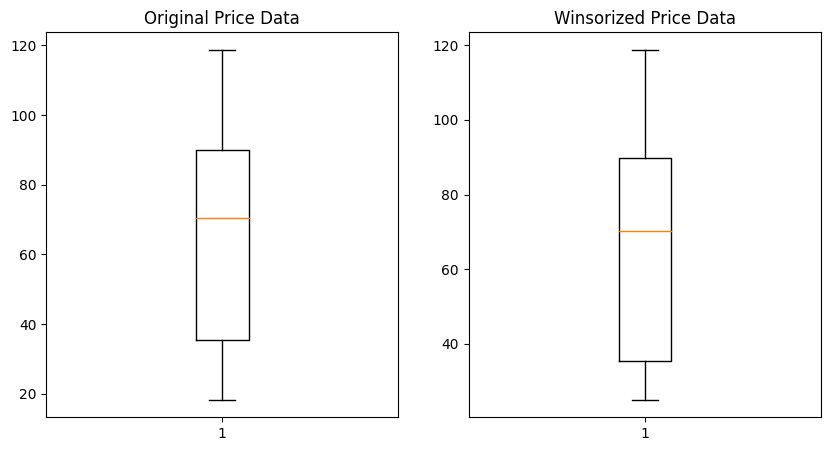

Original Price Data Summary Statistics:
 count    7033.000000
mean       64.762271
std        30.089196
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Winsorized Price Data Summary Statistics:
 count    7033.000000
mean       65.636833
std        28.821903
min        25.050000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: winsorized_MonthlyCharges, dtype: float64


In [126]:
# Winzorizing Monthly Charges between 15 and 100
lower_percentile = 20
upper_percentile = 100

# Calculating the threshold values
lower_threshold = np.percentile(df['MonthlyCharges'], lower_percentile)
upper_threshold = np.percentile(df['MonthlyCharges'], upper_percentile)

# Winsorizing the data
df['winsorized_MonthlyCharges'] = np.clip(df['MonthlyCharges'], lower_threshold, upper_threshold)

# Comparing summary statistics
original_stats_MC = df['MonthlyCharges'].describe()
winsorized_stats_MC = df['winsorized_MonthlyCharges'].describe()

# Creating box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['MonthlyCharges'])
plt.title('Original Price Data')
plt.subplot(1, 2, 2)
plt.boxplot(df['winsorized_MonthlyCharges'])
plt.title('Winsorized Price Data')
plt.show()

print("Original Price Data Summary Statistics:\n", original_stats_MC)
print("\nWinsorized Price Data Summary Statistics:\n", winsorized_stats_MC)

In [127]:
# Statistics on Total Charges (Had to comment out some of the code because of errors)
maximum_TC = df['TotalCharges'].max()
minimum_TC = df['TotalCharges'].min()
# data_range_TC = maximum_TC - minimum_TC
# average_TC = df['TotalCharges'].mean()
# std_deviation_TC = df['TotalCharges'].std()
print(f"Maximum: {maximum_TC}")
print(f"Minimum: {minimum_TC}")
#print(f"Range: {data_range_TC}")
#print(f"Average: {average_TC}")
#print(f"Standard Deviation: {std_deviation_TC}")

Maximum: 999.9
Minimum:  


In [128]:
# Inspecting problem with Total charges
unique_values = df['TotalCharges'].unique().__array__
value_counts = df['TotalCharges'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x175d6ebb0> TotalCharges
20.2      11
          11
19.75      9
19.9       8
20.05      8
          ..
2117.2     1
203.95     1
6849.4     1
692.35     1
6844.5     1
Name: count, Length: 6521, dtype: int64


In [129]:
# Checking the relationship between monthly and toal charges 
df['Charges Match'] = df['MonthlyCharges'] == df['TotalCharges']

In [130]:
unique_values = df['Charges Match'].unique().__array__
value_counts = df['Charges Match'].value_counts()

print(unique_values, value_counts)

<built-in method __array__ of numpy.ndarray object at 0x17661d530> Charges Match
False    7033
Name: count, dtype: int64


In [131]:
summary_stats = df[['MonthlyCharges', 'TotalCharges']].describe()
summary_stats

,MonthlyCharges
count,7033.000000
mean,64.762271
std,30.089196
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [132]:
# Although no null/naan/0 values are found in Total charges it will not calculate a minimum charge
df['TotalCharges'].isna().sum()
min_price = df['TotalCharges'].min()
min_price

' '

In [133]:
blank_rows = df[df['TotalCharges'].isna() | df['TotalCharges'].eq('')]
blank_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,AutomaticPayment,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,winsorized_MonthlyCharges,Charges Match


In [134]:
# Total charges has dtype object so by converting the rows with non-numeric values to NAN we can drop only the necessary rows
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Dropping all the new NAN values
df.dropna(subset=['TotalCharges'], inplace=True)
# Inpsecting the new TotalCharges column with a float value
df['TotalCharges'].describe()


count    7022.000000
mean     2284.121981
std      2266.972770
min        18.800000
25%       401.350000
50%      1397.950000
75%      3799.837500
max      8684.800000
Name: TotalCharges, dtype: float64

In [135]:
# Statistics on Total Charges
maximum_TC = df['TotalCharges'].max()
minimum_TC = df['TotalCharges'].min()
data_range_TC = maximum_TC - minimum_TC
average_TC = df['TotalCharges'].mean()
std_deviation_TC = df['TotalCharges'].std()
print(f"Maximum: {maximum_TC}")
print(f"Minimum: {minimum_TC}")
print(f"Range: {data_range_TC}")
print(f"Average: {average_TC}")
print(f"Standard Deviation: {std_deviation_TC}")

Maximum: 8684.8
Minimum: 18.8
Range: 8666.0
Average: 2284.1219809171175
Standard Deviation: 2266.972769888514


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


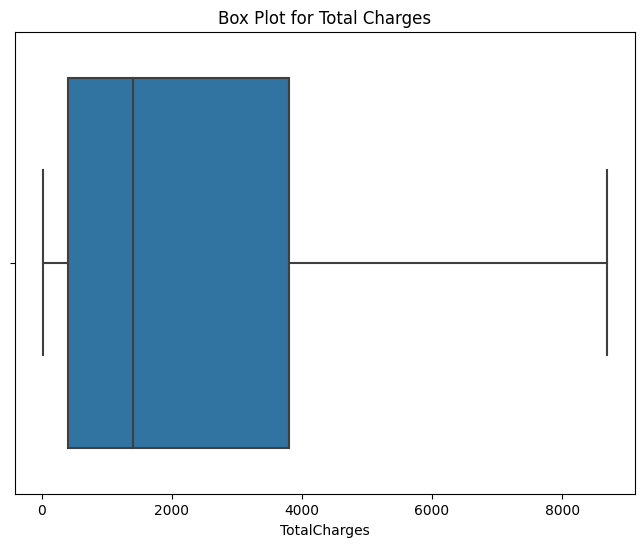

In [136]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title(f'Box Plot for Total Charges')
plt.show()

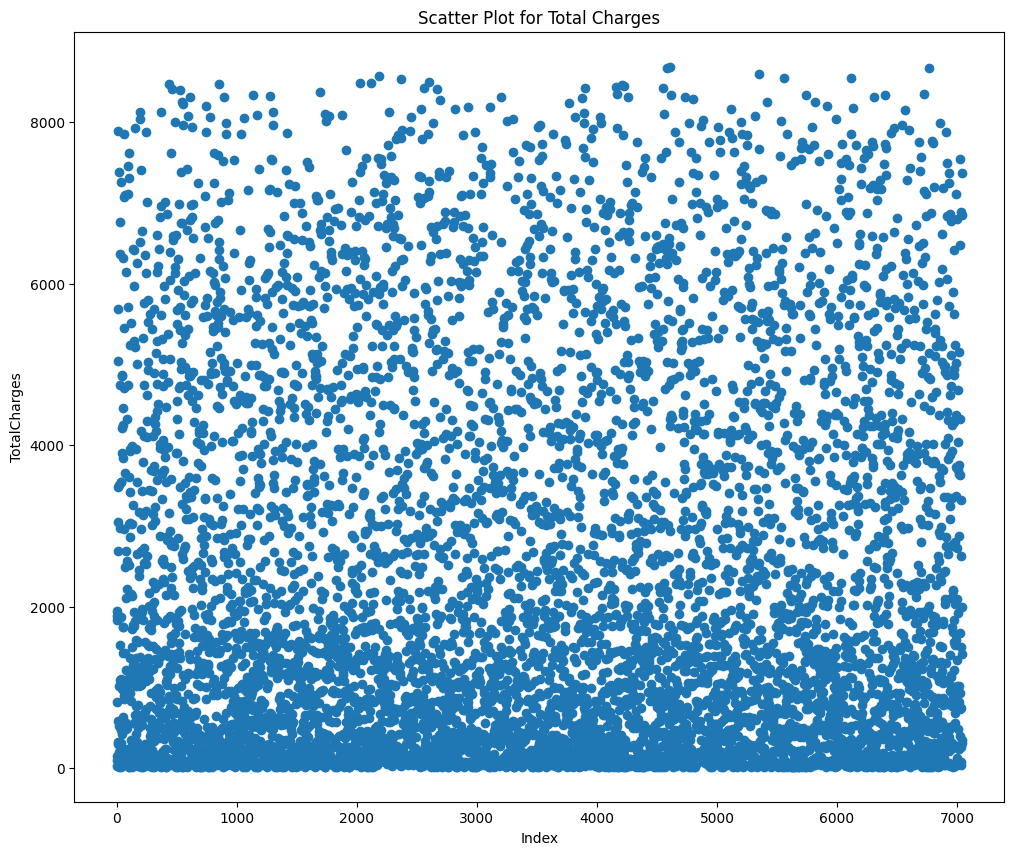

In [137]:
plt.figure(figsize=(12, 10))
plt.scatter(x=df.index, y=df['TotalCharges'])
plt.title(f'Scatter Plot for Total Charges')
plt.xlabel('Index')
plt.ylabel('TotalCharges')
plt.show()

In [138]:
percentile_95 = df['TotalCharges'].quantile(0.95)
df_no_outliers = df[df['TotalCharges'] <= percentile_95]
percentile_95, df_no_outliers

(6921.362499999998,
       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
 0     7590-VHVEG       0              0        1           0       1   
 1     5575-GNVDE       1              0        0           0      34   
 2     3668-QPYBK       1              0        0           0       2   
 3     7795-CFOCW       1              0        0           0      45   
 4     9237-HQITU       0              0        0           0       2   
 ...          ...     ...            ...      ...         ...     ...   
 7037  2569-WGERO       0              0        0           0      72   
 7038  6840-RESVB       1              0        1           1      24   
 7040  4801-JZAZL       0              0        1           1      11   
 7041  8361-LTMKD       1              1        1           0       4   
 7042  3186-AJIEK       1              0        0           0      66   
 
       PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
 0                0       

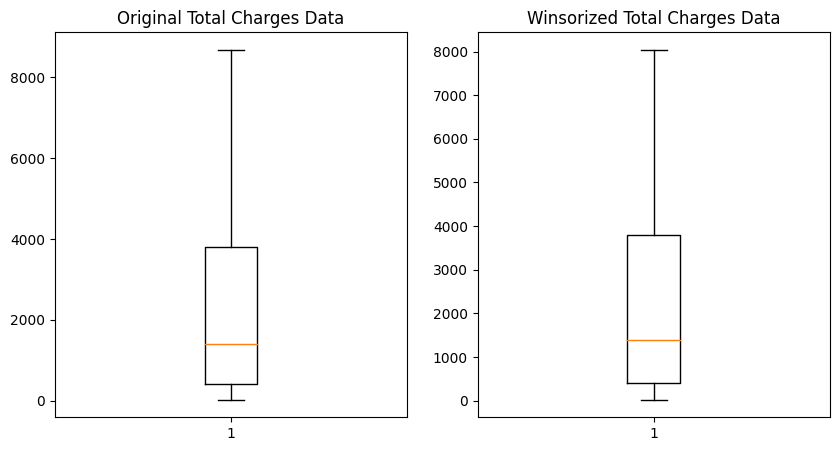

Original Price Data Summary Statistics:
 count    7022.000000
mean     2284.121981
std      2266.972770
min        18.800000
25%       401.350000
50%      1397.950000
75%      3799.837500
max      8684.800000
Name: TotalCharges, dtype: float64

Winsorized Price Data Summary Statistics:
 count    7022.000000
mean     2281.566877
std      2260.265209
min        18.800000
25%       401.350000
50%      1397.950000
75%      3799.837500
max      8040.453000
Name: winsorized_TotalCharges, dtype: float64


In [139]:
# Define the percentile threshold
percentile_threshold = 99

# Calculate the threshold value
threshold_value = np.percentile(df['TotalCharges'], percentile_threshold)

# Apply Winsorization
df['winsorized_TotalCharges'] = np.where(df['TotalCharges'] > threshold_value, threshold_value, df['TotalCharges'])

# Comparing summary statistics
original_stats_TC = df['TotalCharges'].describe()
winsorized_stats_TC = df['winsorized_TotalCharges'].describe()

# Creating box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['TotalCharges'])
plt.title('Original Total Charges Data')
plt.subplot(1, 2, 2)
plt.boxplot(df['winsorized_TotalCharges'])
plt.title('Winsorized Total Charges Data')
plt.show()

print("Original Price Data Summary Statistics:\n", original_stats_TC)
print("\nWinsorized Price Data Summary Statistics:\n", winsorized_stats_TC)

In [140]:
df['winsorized_TotalChargesInt'] = np.floor(df['winsorized_TotalCharges']).astype(int)
df['winsorized_MonthlyChargesInt'] = np.floor(df['winsorized_MonthlyCharges']).astype(int)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,winsorized_MonthlyCharges,Charges Match,winsorized_TotalCharges,winsorized_TotalChargesInt,winsorized_MonthlyChargesInt
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,29.85,0,True,False,False,29.85,False,29.85,29,29
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1889.50,0,False,True,False,56.95,False,1889.50,1889,56
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,108.15,1,True,False,False,53.85,False,108.15,108,53
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1840.75,0,False,True,False,42.30,False,1840.75,1840,42
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,151.65,1,True,False,False,70.70,False,151.65,151,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1990.50,0,False,True,False,84.80,False,1990.50,1990,84
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,...,7362.90,0,False,True,False,103.20,False,7362.90,7362,103
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,346.45,0,True,False,False,29.60,False,346.45,346,29
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,306.60,1,True,False,False,74.40,False,306.60,306,74


In [141]:
# inspecting tenure 
unique_values = df['tenure'].unique()
value_counts = df['tenure'].value_counts()

print(unique_values, value_counts)

[   1   34    2   45    8   22   10   28   62   13   16   58   49   25
   69   52   71   21   12   30   47   72   17   27    5   46   11   70
   63   43   15   60   18   66    9    3   31   50   64   56    7   42
   35   48   29   65   38   68   32   55   37   36   41    6    4   33
   67   23   57   61   14   20   53   40   59   24   44   19   54   51
   26   39 1000  300  -50  500  700] tenure
 1       613
 72      361
 2       237
 3       200
 4       174
        ... 
 1000      1
 300       1
-50        1
 500       1
 700       1
Name: count, Length: 77, dtype: int64


In [142]:
# Statistics on Total Charges
maximum_T = df['tenure'].max()
minimum_T = df['tenure'].min()
data_range_T = maximum_T - minimum_T
average_T = df['tenure'].mean()
std_deviation_T = df['tenure'].std()
print(f"Maximum: {maximum_T}")
print(f"Minimum: {minimum_T}")
print(f"Range: {data_range_T}")
print(f"Average: {average_T}")
print(f"Standard Deviation: {std_deviation_T}")

Maximum: 1000
Minimum: -50
Range: 1050
Average: 32.743235545428654
Standard Deviation: 29.001593828988465


In [143]:
# Checking if the disparity in tenure is corrolated to monthly contracts 
comp_columns = df[['tenure', 'Contract_Month-to-month']]
comp_columns

,tenure,Contract_Month-to-month
0,1,True
1,34,False
2,2,True
3,45,False
4,2,True
...,...,...
7038,24,False
7039,72,False
7040,11,True
7041,4,True


In [144]:
# Very clear that tenure has some incorrect values

In [145]:
# Checking how many columns are higher than 20
threshold = 120
selected_rows = df[df['tenure'] > threshold]
selected_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,winsorized_MonthlyCharges,Charges Match,winsorized_TotalCharges,winsorized_TotalChargesInt,winsorized_MonthlyChargesInt
1482,9290-SHCMB,0,1,0,0,1000,1,0,1,0,...,1235.55,0,True,False,False,96.85,False,1235.55,1235,96
1604,6265-SXWBU,1,0,1,1,300,1,1,1,0,...,6511.25,0,False,True,False,95.75,False,6511.25,6511,95
4612,6723-CEGQI,0,0,0,1,500,0,0,1,0,...,2933.95,0,False,False,True,45.25,False,2933.95,2933,45
5904,9402-CXWPL,0,0,0,0,700,1,1,1,0,...,6838.60,0,False,True,False,98.90,False,6838.60,6838,98


In [146]:
# scaling tenure between 12 and 140
tenure_min = 12
tenure_max = 140
scaler = MinMaxScaler(feature_range=(tenure_min, tenure_max))

df['scaledtenure'] = scaler.fit_transform(df[['tenure']])

print("Original DataFrame:")
print(df['tenure'])

print("\nScaled DataFrame:")
print(df['scaledtenure'])

Original DataFrame:
0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7022, dtype: int64

Scaled DataFrame:
0       18.217143
1       22.240000
2       18.339048
3       23.580952
4       18.339048
          ...    
7038    21.020952
7039    26.872381
7040    19.436190
7041    18.582857
7042    26.140952
Name: scaledtenure, Length: 7022, dtype: float64


In [147]:
# Statistics on scaled tenure
maximum_ST = df['scaledtenure'].max()
minimum_ST = df['scaledtenure'].min()
data_range_ST = maximum_ST - minimum_ST
average_ST = df['scaledtenure'].mean()
std_deviation_ST = df['scaledtenure'].std()
print(f"Maximum: {maximum_ST}")
print(f"Minimum: {minimum_ST}")
print(f"Range: {data_range_ST}")
print(f"Average: {average_ST}")
print(f"Standard Deviation: {std_deviation_ST}")

Maximum: 140.0
Minimum: 12.0
Range: 128.0
Average: 22.086794428395113
Standard Deviation: 3.535432390581451


In [148]:
# Inspecting scaled tenure
unique_values = df['scaledtenure'].unique()
value_counts = df['scaledtenure'].value_counts()

print(unique_values, value_counts)

[ 18.21714286  22.24        18.33904762  23.58095238  19.07047619
  20.77714286  19.31428571  21.50857143  25.65333333  19.68
  20.04571429  25.16571429  24.06857143  21.14285714  26.50666667
  24.43428571  26.75047619  20.6552381   19.55809524  21.75238095
  23.8247619   26.87238095  20.16761905  21.38666667  18.7047619
  23.70285714  19.43619048  26.62857143  25.7752381   23.33714286
  19.92380952  25.40952381  20.28952381  26.14095238  19.19238095
  18.46095238  21.87428571  24.19047619  25.89714286  24.92190476
  18.94857143  23.2152381   22.36190476  23.94666667  21.63047619
  26.01904762  22.72761905  26.3847619   21.99619048  24.8
  22.60571429  22.48380952  23.09333333  18.82666667  18.58285714
  22.11809524  26.26285714  20.89904762  25.04380952  25.53142857
  19.80190476  20.53333333  24.55619048  22.97142857  25.28761905
  21.02095238  23.45904762  20.41142857  24.67809524  24.31238095
  21.2647619   22.84952381 140.          54.66666667  12.
  79.04761905 103.42857143] scal

In [149]:
# Converting scaled tenure to integer
df['scaledtenure'] = df['scaledtenure'].astype(int)


In [150]:
# inspecting scaled tenure as an integer (numbers are very low and lots of disparity) 
unique_values = df['scaledtenure'].unique()
value_counts = df['scaledtenure'].value_counts()

print(unique_values, value_counts)

[ 18  22  23  19  20  21  25  24  26 140  54  12  79 103] scaledtenure
18     1598
26     1105
19      857
21      656
20      645
25      566
24      564
23      517
22      509
140       1
54        1
12        1
79        1
103       1
Name: count, dtype: int64


In [151]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'AutomaticPayment', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'winsorized_MonthlyCharges', 'Charges Match', 'winsorized_TotalCharges',
       'winsorized_TotalChargesInt', 'winsorized_MonthlyChargesInt',
       'scaledtenure'],
      dtype='object')

In [152]:
# Converting all boolean values to integers
df['ContractMonthtoMonthInt'] = np.floor(df['Contract_Month-to-month']).astype(int)
df['ContractOneYearInt'] = np.floor(df['Contract_One year']).astype(int)
df['ContractTwoYearInt'] = np.floor(df['Contract_Two year']).astype(int)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract_Two year,winsorized_MonthlyCharges,Charges Match,winsorized_TotalCharges,winsorized_TotalChargesInt,winsorized_MonthlyChargesInt,scaledtenure,ContractMonthtoMonthInt,ContractOneYearInt,ContractTwoYearInt
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,False,29.85,False,29.85,29,29,18,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,False,56.95,False,1889.50,1889,56,22,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,False,53.85,False,108.15,108,53,18,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,False,42.30,False,1840.75,1840,42,23,0,1,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,False,70.70,False,151.65,151,70,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,False,84.80,False,1990.50,1990,84,21,0,1,0
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,...,False,103.20,False,7362.90,7362,103,26,0,1,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,False,29.60,False,346.45,346,29,19,1,0,0
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,False,74.40,False,306.60,306,74,18,1,0,0


In [153]:
# Reordering the df to follow data matrix conventions
new_order_DM = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'AutomaticPayment', 'ContractMonthtoMonthInt',
       'ContractOneYearInt', 'ContractTwoYearInt',
       'scaledtenure', 'winsorized_MonthlyChargesInt', 'winsorized_TotalChargesInt', 'Churn']
df = df[new_order_DM]

print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'AutomaticPayment', 'ContractMonthtoMonthInt',
       'ContractOneYearInt', 'ContractTwoYearInt', 'scaledtenure',
       'winsorized_MonthlyChargesInt', 'winsorized_TotalChargesInt', 'Churn'],
      dtype='object')


In [154]:
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,AutomaticPayment,ContractMonthtoMonthInt,ContractOneYearInt,ContractTwoYearInt,scaledtenure,winsorized_MonthlyChargesInt,winsorized_TotalChargesInt,Churn
0,0,0,1,0,0,0,1,0,1,0,...,0,1,0,1,0,0,18,29,29,0
1,1,0,0,0,1,0,1,1,0,1,...,0,0,0,0,1,0,22,56,1889,0
2,1,0,0,0,1,0,1,1,1,0,...,0,1,0,1,0,0,18,53,108,1
3,1,0,0,0,0,0,1,1,0,1,...,0,0,1,0,1,0,23,42,1840,0
4,0,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,18,70,151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,1,0,1,...,1,1,0,0,1,0,21,84,1990,0
7039,0,0,1,1,1,1,1,0,1,1,...,1,1,1,0,1,0,26,103,7362,0
7040,0,0,1,1,0,0,1,1,0,0,...,0,1,0,1,0,0,19,29,346,0
7041,1,1,1,0,1,1,1,0,0,0,...,0,1,0,1,0,0,18,74,306,1


In [155]:
df.dtypes

gender                          int64
SeniorCitizen                   int64
Partner                         int64
Dependents                      int64
PhoneService                    int64
MultipleLines                   int64
InternetService                 int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
AutomaticPayment                int64
ContractMonthtoMonthInt         int64
ContractOneYearInt              int64
ContractTwoYearInt              int64
scaledtenure                    int64
winsorized_MonthlyChargesInt    int64
winsorized_TotalChargesInt      int64
Churn                           int64
dtype: object

In [156]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'AutomaticPayment', 'ContractMonthtoMonthInt',
       'ContractOneYearInt', 'ContractTwoYearInt', 'scaledtenure',
       'winsorized_MonthlyChargesInt', 'winsorized_TotalChargesInt', 'Churn'],
      dtype='object')

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

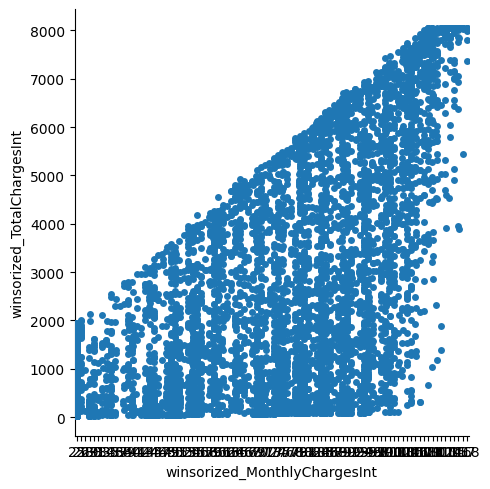

In [157]:
#Data visualizations
sns.catplot(x = 'winsorized_MonthlyChargesInt', y = 'winsorized_TotalChargesInt', data = df)

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


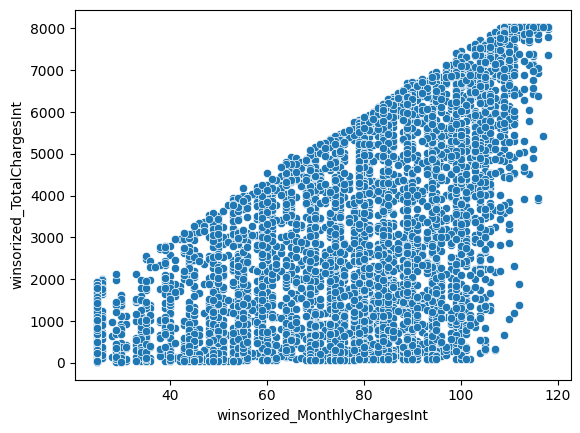

In [158]:
boundary = 100
sns.scatterplot(x = 'winsorized_MonthlyChargesInt', y = 'winsorized_TotalChargesInt', data = df)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 1)

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


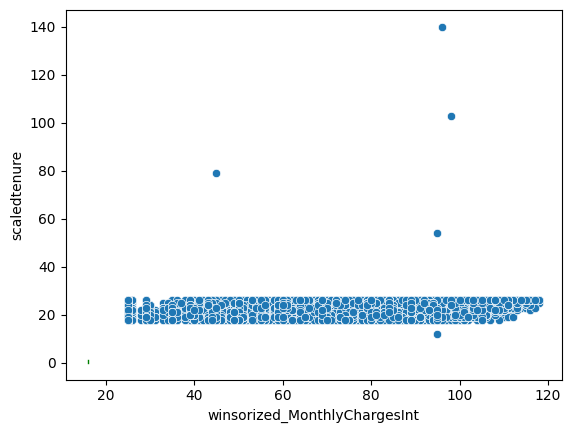

In [159]:
boundary = 16
sns.scatterplot(x = 'winsorized_MonthlyChargesInt', y = 'scaledtenure', data = df)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 1)

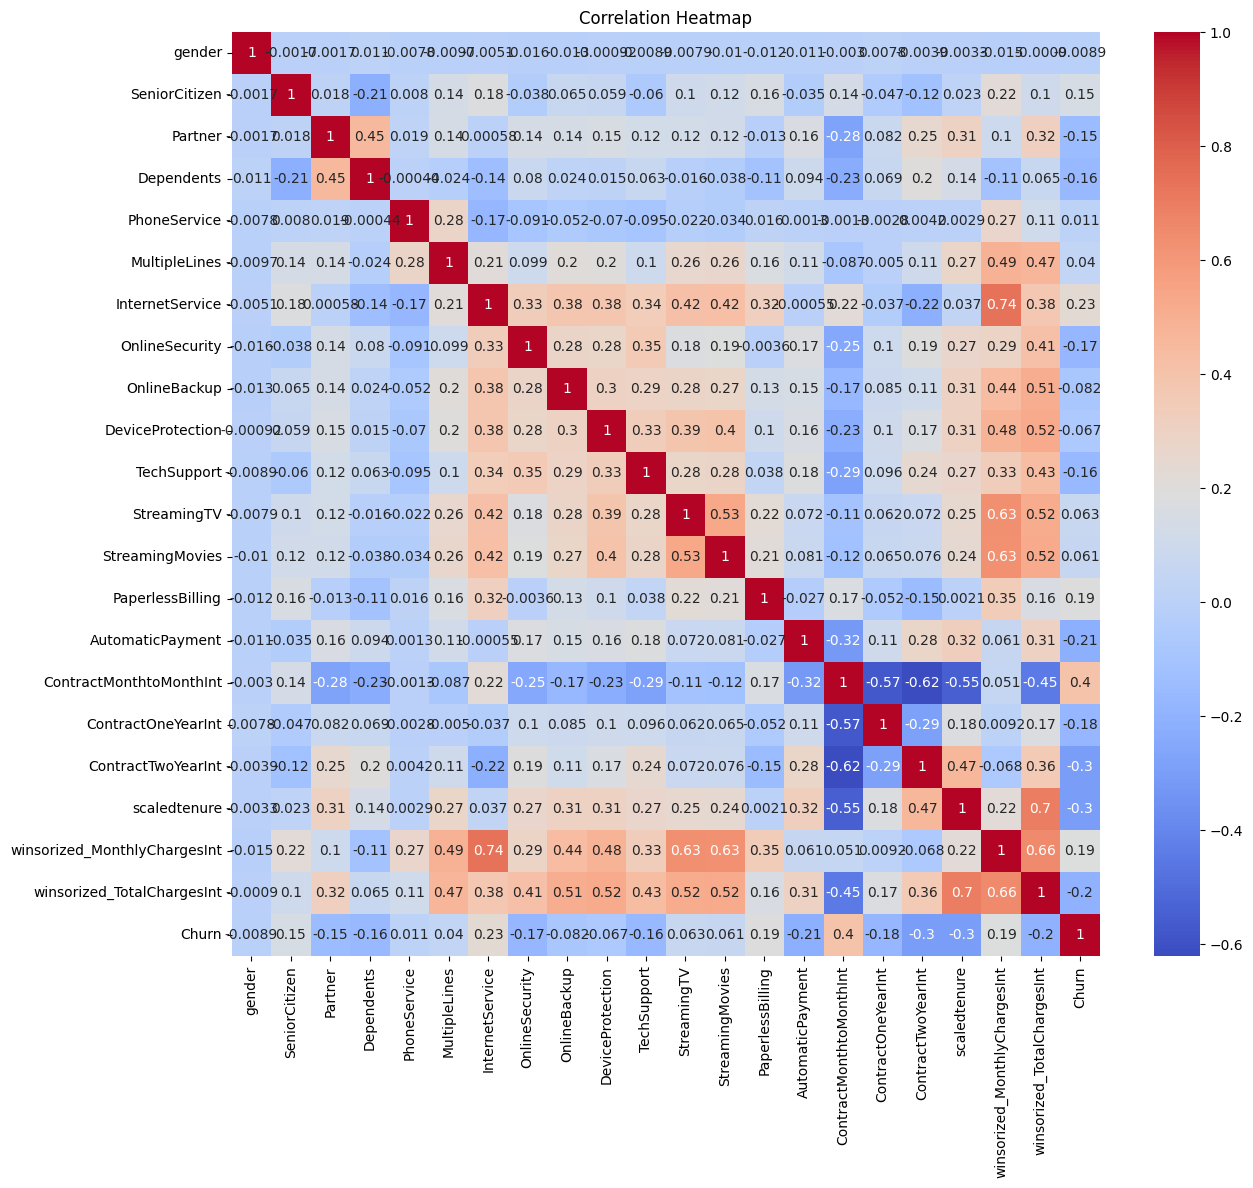

In [160]:
plt.figure(figsize=(14, 12)) 
correlation_matrix = df.corr()  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [161]:
exclude = ['scaledtenure',
       'winsorized_MonthlyChargesInt', 'winsorized_TotalChargesInt', 'Churn']  # If you don't need to exclude any rows
corrs = df.corr()['Churn'].drop(exclude, axis=0)
corrs_sorted = corrs.sort_values(axis=0)
corrs_sorted

ContractTwoYearInt        -0.301641
AutomaticPayment          -0.210664
ContractOneYearInt        -0.177390
OnlineSecurity            -0.171777
TechSupport               -0.164998
Dependents                -0.163459
Partner                   -0.149866
OnlineBackup              -0.082358
DeviceProtection          -0.066568
gender                    -0.008901
PhoneService               0.011486
MultipleLines              0.040071
StreamingMovies            0.060993
StreamingTV                0.063031
SeniorCitizen              0.150541
PaperlessBilling           0.191675
InternetService            0.227562
ContractMonthtoMonthInt    0.404098
Name: Churn, dtype: float64

In [162]:
for col in df.columns:
    print(f"Column '{col}' shape: {df[col].shape}")

Column 'gender' shape: (7022,)
Column 'SeniorCitizen' shape: (7022,)
Column 'Partner' shape: (7022,)
Column 'Dependents' shape: (7022,)
Column 'PhoneService' shape: (7022,)
Column 'MultipleLines' shape: (7022,)
Column 'InternetService' shape: (7022,)
Column 'OnlineSecurity' shape: (7022,)
Column 'OnlineBackup' shape: (7022,)
Column 'DeviceProtection' shape: (7022,)
Column 'TechSupport' shape: (7022,)
Column 'StreamingTV' shape: (7022,)
Column 'StreamingMovies' shape: (7022,)
Column 'PaperlessBilling' shape: (7022,)
Column 'AutomaticPayment' shape: (7022,)
Column 'ContractMonthtoMonthInt' shape: (7022,)
Column 'ContractOneYearInt' shape: (7022,)
Column 'ContractTwoYearInt' shape: (7022,)
Column 'scaledtenure' shape: (7022,)
Column 'winsorized_MonthlyChargesInt' shape: (7022,)
Column 'winsorized_TotalChargesInt' shape: (7022,)
Column 'Churn' shape: (7022,)


In [163]:
df.shape

(7022, 22)

In [164]:
for col in df.columns:
    try:
        filtered_df = df[df[col] > 2]
        print(f"Indexing successful for column '{col}'")
    except Exception as e:
        print(f"Indexing error for column '{col}': {e}")

Indexing successful for column 'gender'
Indexing successful for column 'SeniorCitizen'
Indexing successful for column 'Partner'
Indexing successful for column 'Dependents'
Indexing successful for column 'PhoneService'
Indexing successful for column 'MultipleLines'
Indexing successful for column 'InternetService'
Indexing successful for column 'OnlineSecurity'
Indexing successful for column 'OnlineBackup'
Indexing successful for column 'DeviceProtection'
Indexing successful for column 'TechSupport'
Indexing successful for column 'StreamingTV'
Indexing successful for column 'StreamingMovies'
Indexing successful for column 'PaperlessBilling'
Indexing successful for column 'AutomaticPayment'
Indexing successful for column 'ContractMonthtoMonthInt'
Indexing successful for column 'ContractOneYearInt'
Indexing successful for column 'ContractTwoYearInt'
Indexing successful for column 'scaledtenure'
Indexing successful for column 'winsorized_MonthlyChargesInt'
Indexing successful for column 'wi

In [165]:
exclude = ['scaledtenure',
       'winsorized_MonthlyChargesInt', 'winsorized_TotalChargesInt', 'Churn']  # If you don't need to exclude any rows
corrs = df.corr()['Churn'].drop(exclude, axis=0)
corrs_sorted = corrs.sort_values(axis=0)
corrs_sorted

ContractTwoYearInt        -0.301641
AutomaticPayment          -0.210664
ContractOneYearInt        -0.177390
OnlineSecurity            -0.171777
TechSupport               -0.164998
Dependents                -0.163459
Partner                   -0.149866
OnlineBackup              -0.082358
DeviceProtection          -0.066568
gender                    -0.008901
PhoneService               0.011486
MultipleLines              0.040071
StreamingMovies            0.060993
StreamingTV                0.063031
SeniorCitizen              0.150541
PaperlessBilling           0.191675
InternetService            0.227562
ContractMonthtoMonthInt    0.404098
Name: Churn, dtype: float64

In [166]:
# Columns to convert to booleans
columns_to_convert = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'AutomaticPayment', 'ContractMonthtoMonthInt',
       'ContractOneYearInt', 'ContractTwoYearInt', 'Churn']

# Convert selected columns to booleans
df[columns_to_convert] = df[columns_to_convert].astype(bool)


/var/folders/xg/p3q3yztd1tzgf72581g38x4h0000gn/T/ipykernel_29113/2916817726.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_convert] = df[columns_to_convert].astype(bool)


In [167]:
df.dtypes

gender                           bool
SeniorCitizen                    bool
Partner                          bool
Dependents                       bool
PhoneService                     bool
MultipleLines                    bool
InternetService                  bool
OnlineSecurity                   bool
OnlineBackup                     bool
DeviceProtection                 bool
TechSupport                      bool
StreamingTV                      bool
StreamingMovies                  bool
PaperlessBilling                 bool
AutomaticPayment                 bool
ContractMonthtoMonthInt          bool
ContractOneYearInt               bool
ContractTwoYearInt               bool
scaledtenure                    int64
winsorized_MonthlyChargesInt    int64
winsorized_TotalChargesInt      int64
Churn                            bool
dtype: object